# Decision Tree (Classificação ou Regressão)

* Não precisa de escalonamento

In [11]:
import pickle
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn import tree

In [26]:
# Com escalonamento
with open('../data/credit1.pkl', 'rb') as f:
    x_credit_train, y_credit_train, x_credit_test, y_credit_test = pickle.load(f)

# Sem escalonamento
with open('../data/credit.pkl', 'rb') as f:
    x_credit_train, y_credit_train, x_credit_test, y_credit_test = pickle.load(f)

In [27]:
# Treinamento
decision_tree = DecisionTreeClassifier(criterion='entropy',
                                       random_state=0)

decision_tree.fit(x_credit_train, y_credit_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
predict = decision_tree.predict(x_credit_test)
print(classification_report(y_credit_test, predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [29]:
accuracy_score(y_credit_test, predict)

0.982

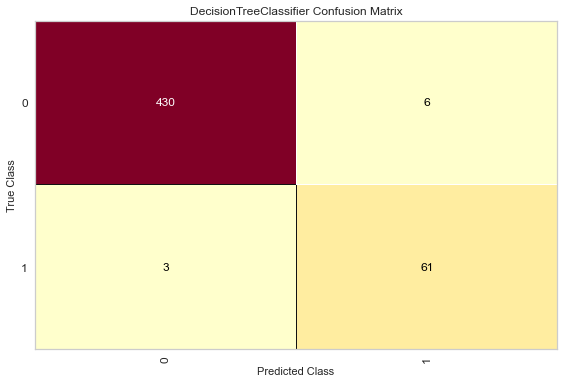

In [30]:
# Matriz de Confusão
cm = ConfusionMatrix(decision_tree)
cm.fit(x_credit_train, y_credit_train)
cm.score(x_credit_test, y_credit_test)
cm.show();

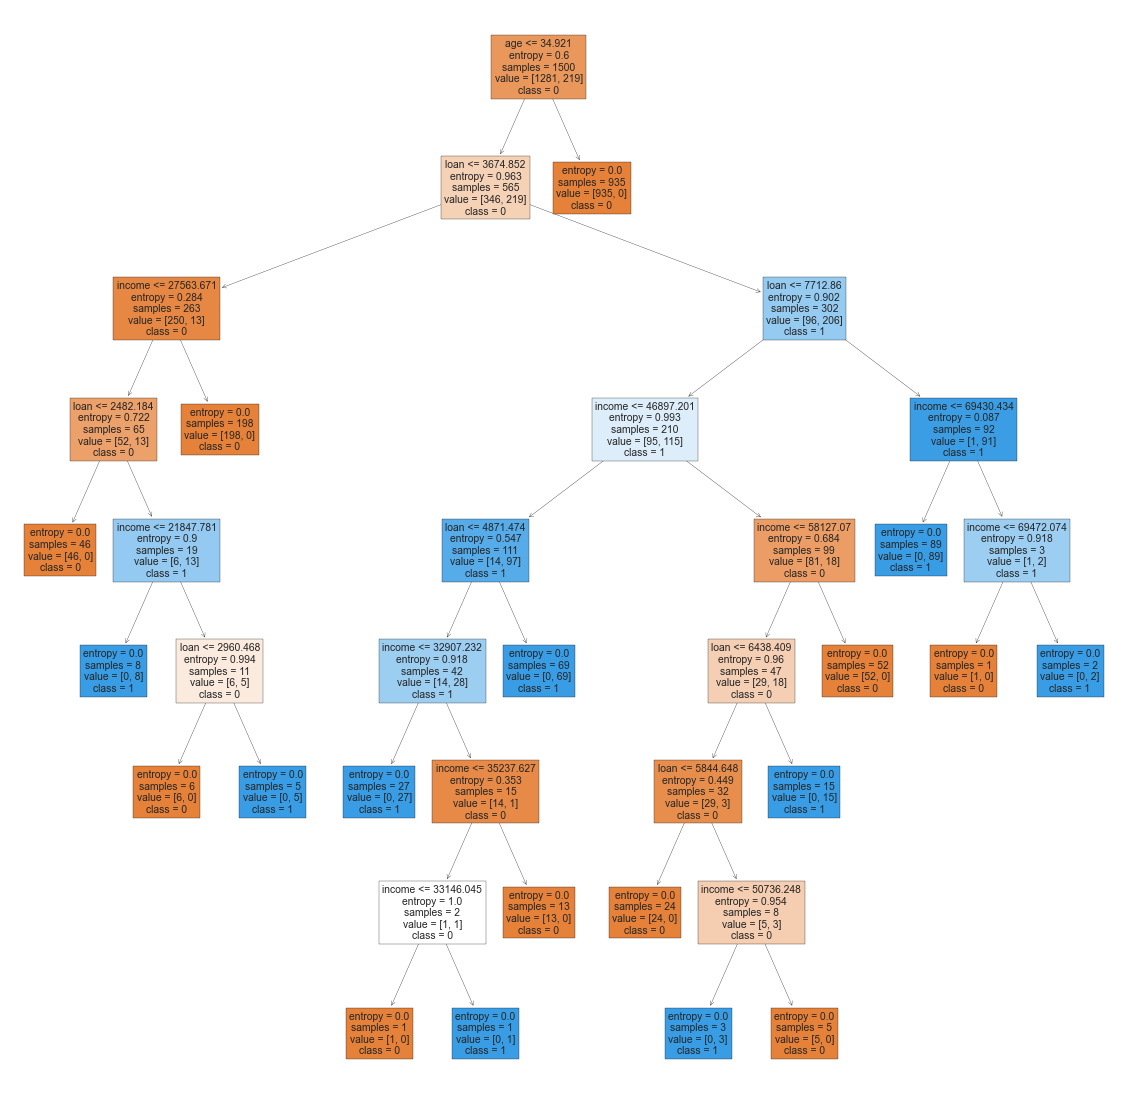

In [31]:
# Gráfico da Árvore de Decisão
x_class = ['income','age','loan']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(decision_tree, feature_names=x_class, class_names=['0','1'], filled=True);